In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = np.load('../xi_calculation_visualization/data_for_xi_calculation/dX_data_t=27_to_t=30_grid_32_c=1by32_decor_t_32min.npz')
data2 = np.load('../xi_calculation_visualization/data_for_xi_calculation/dX_data_t=30_to_t=33_grid_32_c=1by32_decor_t_32min.npz')
data3 = np.load('../xi_calculation_visualization/data_for_xi_calculation/dX_data_t=33_to_t=36_grid_32_c=1by32_decor_t_32min.npz')
data4 = np.load('../xi_calculation_visualization/data_for_xi_calculation/dX_data_t=36_to_t=39_grid_32_c=1by32_decor_t_32min.npz')
data5 = np.load('../xi_calculation_visualization/data_for_xi_calculation/dX_data_t=39_to_t=42_grid_32_c=1by32_decor_t_32min.npz')
data6 = np.load('../xi_calculation_visualization/data_for_xi_calculation/dX_data_t=42_to_t=45_grid_32_c=1by32_decor_t_32min.npz')

In [31]:
data1.files

['dX_x', 'dX_y']

In [32]:
dX1 = np.concatenate((data1['dX_x'], data2['dX_x'], data3['dX_x'], data4['dX_x'], data5['dX_x'], data6['dX_x']), axis=0)
dX2 = np.concatenate((data1['dX_y'], data2['dX_y'], data3['dX_y'], data4['dX_y'], data5['dX_y'], data6['dX_y']), axis=0)

In [33]:
dX1.shape, dX2.shape

((451, 7392), (451, 7392))

In [34]:
dX = np.concatenate((dX1, dX2), axis=1)
dX.shape

(451, 14784)

In [35]:
m = dX.shape[0]
print(m)

451


In [36]:
from numpy import linalg as LA
from scipy import signal

In [37]:
Dt_c = 0.04
scaled_dX = dX/np.sqrt(Dt_c)

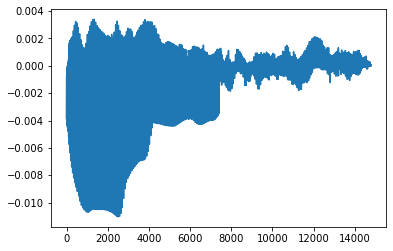

In [38]:
xi_0 = np.mean(scaled_dX, axis=0)
plt.plot(xi_0)

In [39]:
xi_0 = np.reshape(xi_0, (1, -1))
xi_0.shape

(1, 14784)

In [40]:
F = signal.detrend(scaled_dX, axis=0, type='constant')
F.shape

(451, 14784)

In [41]:
A, b, CT = LA.svd(F, full_matrices=False)

In [42]:
print(b) # variances of the EOFs 

[1.92266672e+00 1.73031559e+00 1.61884266e+00 1.49663902e+00
 1.41059303e+00 1.31311037e+00 1.28128637e+00 1.21593462e+00
 1.09071699e+00 1.05406860e+00 9.90381027e-01 9.58496897e-01
 9.45642044e-01 9.28502442e-01 8.87656401e-01 8.84480562e-01
 8.38279884e-01 8.10981348e-01 7.61217003e-01 7.42751536e-01
 7.35301533e-01 6.96548448e-01 6.74636526e-01 6.54304886e-01
 6.48211933e-01 6.32427869e-01 6.26703421e-01 6.21755800e-01
 5.91480078e-01 5.71993171e-01 5.53296001e-01 5.46615601e-01
 5.27168840e-01 5.11047265e-01 5.01271713e-01 4.86061030e-01
 4.68570236e-01 4.67842674e-01 4.51839353e-01 4.47272297e-01
 4.42660912e-01 4.35957630e-01 4.30567032e-01 4.22897712e-01
 4.07117076e-01 3.85646211e-01 3.76852488e-01 3.71966734e-01
 3.67708567e-01 3.54396767e-01 3.46560491e-01 3.41801234e-01
 3.33899001e-01 3.30726043e-01 3.24356303e-01 3.19611110e-01
 3.17262082e-01 3.13271295e-01 3.02384971e-01 2.94288782e-01
 2.91765784e-01 2.88741739e-01 2.84750395e-01 2.81612741e-01
 2.75658346e-01 2.746505

In [43]:
B = np.diag(b) # matrix containing variances

In [44]:
A.shape, B.shape, CT.shape

((451, 451), (451, 451), (451, 14784))

In [45]:
t_mat = np.matmul(A,B) # matrix containig time-series info
t_mat.shape

(451, 451)

In [46]:
xi_mat = CT # this matrix contain the EOFs

51 EOFs contain 90 percent of the total variance. Therefore we only extract this info from SVD of F

In [47]:
n_EOFs = 51

In [48]:
D = np.matmul(t_mat[:,:n_EOFs], xi_mat[:n_EOFs,:]) # info corresponding to 51 EOFs
t_mat[:,:n_EOFs].shape, xi_mat[:n_EOFs,:].shape, D.shape

((451, 51), (51, 14784), (451, 14784))

In [49]:
E = xi_0 + D # this should be approximately equal to matrix scaled_dX
# E = D #  not including the mean has very small effect on the final matrix
E.shape

(451, 14784)

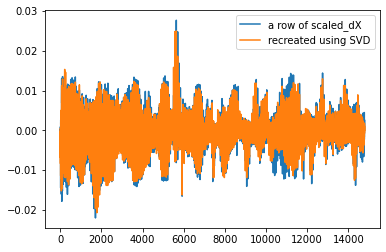

In [50]:
# rand_ele = int(np.random.uniform(0, 200))
rand_ele = 0
plt.plot(scaled_dX[rand_ele, :], label='a row of scaled_dX')
plt.plot(E[rand_ele,:], label='recreated using SVD')
plt.legend()

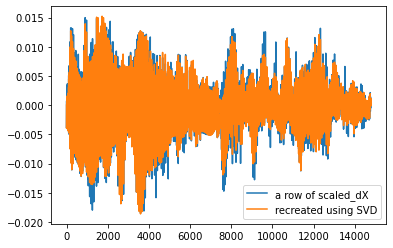

In [51]:
rand_ele = 200
plt.plot(scaled_dX[rand_ele, :], label='a row of scaled_dX')
plt.plot(E[rand_ele,:], label='recreated using SVD')
plt.legend()

In [52]:
combined_vec = E
detached_vec = np.zeros((combined_vec.shape[0],int(combined_vec.shape[1]/2),2))
for i in range(combined_vec.shape[0]):
    detached_vec[i,:,0] = combined_vec[i,:int(combined_vec.shape[1]/2)]
    detached_vec[i,:,1] = combined_vec[i,int(combined_vec.shape[1]/2):]
    
combined_vec.shape, detached_vec.shape

((451, 14784), (451, 7392, 2))

In [53]:
stoch_f_mat = detached_vec
stoch_f_mat.shape

(451, 7392, 2)

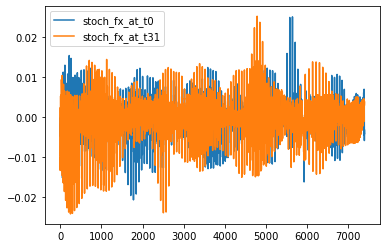

In [54]:
plt.plot(stoch_f_mat[0,:,0], label='stoch_fx_at_t0')
plt.plot(stoch_f_mat[31,:,0], label='stoch_fx_at_t31')
plt.legend()

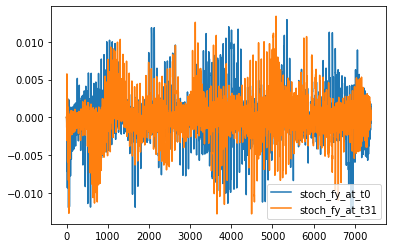

In [55]:
plt.plot(stoch_f_mat[0,:,1], label='stoch_fy_at_t0')
plt.plot(stoch_f_mat[31,:,1], label='stoch_fy_at_t31')
plt.legend()

In [56]:
data_file = './forcing/stochastic_forcing_as_deterministic_t27_to_t45_mesh32_var90.npz'

np.savez(data_file, stoch_f_mat = stoch_f_mat)